In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [147]:
df=pd.read_excel(r'''C:\Users\HP\Downloads\final_final_final.xlsx''',parse_dates=True,index_col='date')

In [148]:
df

,LTP,% change,high,low,open,qty
date,,,,,,
2022-09-15,781.0,-2.25,812.8,779.0,812.0,58510
2022-09-14,799.0,3.77,802.0,774.0,775.0,82172
2022-09-13,770.0,1.99,772.0,751.0,765.0,77706
2022-09-12,755.0,-0.53,761.0,748.3,755.0,54259
2022-09-11,759.0,-0.13,767.0,755.0,760.0,41713
...,...,...,...,...,...,...
2014-08-12,2415.0,-2.31,2470.0,2415.0,2472.0,1179
2014-08-05,2500.0,0.81,2550.0,2500.0,2480.0,4958
2014-08-04,2480.0,-3.99,2560.0,2470.0,2583.0,1906


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1752 entries, 2022-09-15 to 2014-07-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LTP       1752 non-null   float64
 1   % change  1752 non-null   float64
 2   high      1752 non-null   float64
 3   low       1752 non-null   float64
 4   open      1752 non-null   float64
 5   qty       1752 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 95.8 KB


In [150]:
len(df)

1752

In [151]:
# Using graph_objects
import plotly.graph_objects as go

import pandas as pd
df=pd.read_excel(r'''C:\Users\HP\Downloads\final_final_final.xlsx''')
fig = go.Figure([go.Scatter(x=df['date'], y=df['high'])])
fig.show()

In [152]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [153]:
pip install matplotlib

In [154]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df=pd.read_excel(r'''C:\Users\HP\Downloads\final_final_final.xlsx''')

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['LTP'])])

fig.show()


In [155]:
nabil_open=df['open']

In [156]:
nabil_open.reset_index(drop=True,inplace=True)
nabil_open.shape

(1752,)

In [157]:
nabil_open=pd.DataFrame(nabil_open)

In [357]:
train=nabil_open.iloc[:1737]
test=nabil_open.iloc[1737:]


In [358]:
test.shape

(15, 1)

In [359]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [360]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [361]:
from sklearn.preprocessing import MinMaxScaler

In [362]:
scalar=MinMaxScaler()

In [363]:
scalar.fit(train)

MinMaxScaler()

In [364]:
scaled_train=scalar.transform(train)
scaled_test=scalar.transform(test)

In [365]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [366]:
#creating model
test.shape

(15, 1)

In [367]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [368]:
length=15
batch_size=4
generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=length,batch_size=batch_size)

In [369]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [370]:
n_features=1

In [371]:
model=Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
#fully connected layer occupies most of the parameter and hence neuron develop co-dependencies among each other
#during training which curbs the individual power of each neuron leading to overfitting
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')



In [372]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 30)                960       
                                                                 
 dropout_22 (Dropout)        (None, 30)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [373]:
model.fit_generator(generator,epochs=30, shuffle=False)  

Epoch 1/30


C:\Users\HP\AppData\Local\Temp/ipykernel_11356/3583973593.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



431/431 [==============================] - 3s 5ms/step - loss: 0.0083
Epoch 2/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0046
Epoch 3/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0027
Epoch 4/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0025
Epoch 5/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0021
Epoch 6/30
431/431 [==============================] - 2s 5ms/step - loss: 0.0018
Epoch 7/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 8/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 9/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 10/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0013
Epoch 11/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 12/30
431/431 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 13/30
431/431 [===============

In [374]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

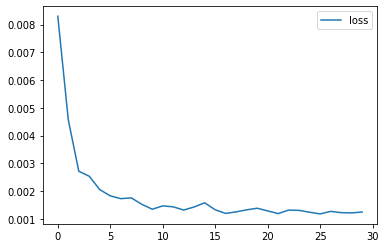

In [375]:
losses.plot()

In [376]:
#evaluate test set
first_eval_batch=scaled_train[-length:]  #picks  last  values

In [377]:
first_eval_batch=first_eval_batch.reshape(1,length,1)

In [378]:
first_eval_batch

array([[[0.78703265],
        [0.77851396],
        [0.82016091],
        [0.82962612],
        [0.82489352],
        [0.83861808],
        [0.813062  ],
        [0.81258874],
        [0.75059158],
        [0.73213441],
        [0.73970658],
        [0.76668244],
        [0.79176526],
        [0.780407  ],
        [0.77283483]]])

In [379]:
model.predict(first_eval_batch)  #first prediction after train set which is first value of test


array([[0.79213154]], dtype=float32)

In [380]:
scaled_test[0]

array([0.80123048])

In [381]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)
for i in range(len(test)):
    #get prediction 1 time stamp ahead [0] is for grabbing just the number instrad of array
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    


In [382]:
test_predictions

[array([0.79213154], dtype=float32),
 array([0.8096908], dtype=float32),
 array([0.8232459], dtype=float32),
 array([0.8370795], dtype=float32),
 array([0.8496076], dtype=float32),
 array([0.86297715], dtype=float32),
 array([0.87617946], dtype=float32),
 array([0.8872107], dtype=float32),
 array([0.8938097], dtype=float32),
 array([0.8979756], dtype=float32),
 array([0.90089846], dtype=float32),
 array([0.90284735], dtype=float32),
 array([0.9040635], dtype=float32),
 array([0.90428424], dtype=float32),
 array([0.9036847], dtype=float32)]

In [383]:
true_predictions=scalar.inverse_transform(test_predictions)

In [384]:
true_predictions

array([[2300.7739507 ],
       [2337.87660438],
       [2366.51855075],
       [2395.74903631],
       [2422.22083104],
       [2450.47071183],
       [2478.36719203],
       [2501.6762656 ],
       [2515.61984575],
       [2524.42249268],
       [2530.59843874],
       [2534.7164498 ],
       [2537.28622371],
       [2537.75259662],
       [2536.48571974]])

In [385]:
test['predictions']=true_predictions

C:\Users\HP\AppData\Local\Temp/ipykernel_11356/2081619921.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [386]:
test

,open,predictions
1737,2320.0,2300.773951
1738,2365.0,2337.876604
1739,2397.0,2366.518551
1740,2402.0,2395.749036
1741,2462.0,2422.220831
1742,2412.0,2450.470712
1743,2360.0,2478.367192
1744,2470.0,2501.676266
1745,2441.0,2515.619846
1746,2415.0,2524.422493


<AxesSubplot:>

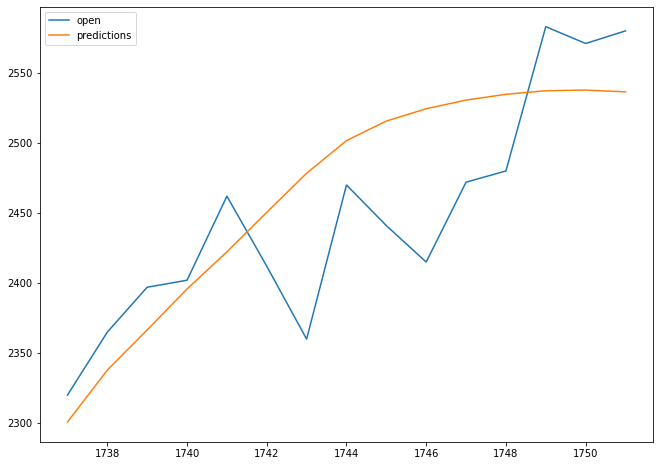

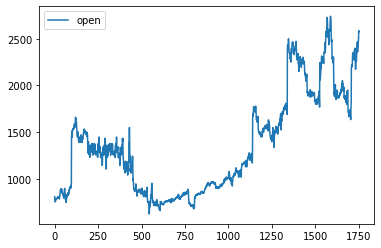

In [387]:
test.plot(figsize=(11,8))
nabil_open.plot()

In [388]:
# create full model
full_scalar=MinMaxScaler()
scaled_full_data= full_scalar.fit_transform(nabil_open)


In [389]:
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                              length=length,batch_size=3)

In [390]:
model=Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [391]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


C:\Users\HP\AppData\Local\Temp/ipykernel_11356/3531706309.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



579/579 [==============================] - 4s 5ms/step - loss: 0.0136
Epoch 2/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0046
Epoch 3/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0028
Epoch 4/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0026
Epoch 5/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0028
Epoch 6/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0019
Epoch 7/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0018
Epoch 8/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0017
Epoch 9/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 10/10
579/579 [==============================] - 3s 4ms/step - loss: 0.0015


<AxesSubplot:>

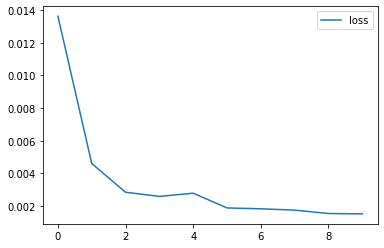

In [392]:
full_model_losses=pd.DataFrame(model.history.history)
full_model_losses.plot()

In [393]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)
for i in range(40):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [394]:
forecast=scalar.inverse_transform(forecast)

In [395]:
forecast

array([[2331.85985231],
       [2378.23278528],
       [2441.78254855],
       [2493.60145259],
       [2535.96229392],
       [2586.15563083],
       [2633.8556422 ],
       [2678.30514902],
       [2712.5910514 ],
       [2735.09307188],
       [2758.65138984],
       [2779.24736452],
       [2793.93351412],
       [2803.47104788],
       [2808.43251002],
       [2811.17331672],
       [2812.53200722],
       [2812.57835484],
       [2811.38515556],
       [2808.83477712],
       [2805.92721975],
       [2803.30127454],
       [2800.79145026],
       [2798.33074439],
       [2796.01663804],
       [2794.02117157],
       [2792.44610822],
       [2791.25542784],
       [2790.38540244],
       [2789.75744259],
       [2789.34711504],
       [2789.16877747],
       [2789.18389082],
       [2789.32394123],
       [2789.53955841],
       [2789.80656099],
       [2790.11084318],
       [2790.43124628],
       [2790.74610782],
       [2791.03829932]])

In [396]:
df_array=np.array(nabil_open)
df_array

array([[ 812.],
       [ 775.],
       [ 765.],
       ...,
       [2583.],
       [2571.],
       [2580.]])

In [397]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))


In [398]:
forecast.flatten()

array([2331.85985231, 2378.23278528, 2441.78254855, 2493.60145259,
       2535.96229392, 2586.15563083, 2633.8556422 , 2678.30514902,
       2712.5910514 , 2735.09307188, 2758.65138984, 2779.24736452,
       2793.93351412, 2803.47104788, 2808.43251002, 2811.17331672,
       2812.53200722, 2812.57835484, 2811.38515556, 2808.83477712,
       2805.92721975, 2803.30127454, 2800.79145026, 2798.33074439,
       2796.01663804, 2794.02117157, 2792.44610822, 2791.25542784,
       2790.38540244, 2789.75744259, 2789.34711504, 2789.16877747,
       2789.18389082, 2789.32394123, 2789.53955841, 2789.80656099,
       2790.11084318, 2790.43124628, 2790.74610782, 2791.03829932])

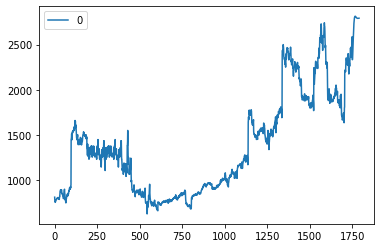

In [399]:
full_data.plot();

In [400]:
#LSTM MODEL  

In [401]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [402]:
length

15

In [403]:
scaled_test.shape


(15, 1)

In [447]:
length=14
generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=length,batch_size=2)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,
                                         length=length,batch_size=2)

In [448]:
model=Sequential()
model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [449]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop],shuffle=False)


Epoch 1/10


C:\Users\HP\AppData\Local\Temp/ipykernel_11356/3949592432.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



862/862 [==============================] - 11s 9ms/step - loss: 0.0049 - val_loss: 0.0022
Epoch 2/10
862/862 [==============================] - 8s 9ms/step - loss: 0.0050 - val_loss: 3.1389e-04
Epoch 3/10
862/862 [==============================] - 8s 9ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 4/10
862/862 [==============================] - 8s 9ms/step - loss: 0.0022 - val_loss: 1.8837e-04
Epoch 5/10
862/862 [==============================] - 8s 9ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/10
862/862 [==============================] - 8s 10ms/step - loss: 0.0017 - val_loss: 5.6425e-04


<AxesSubplot:>

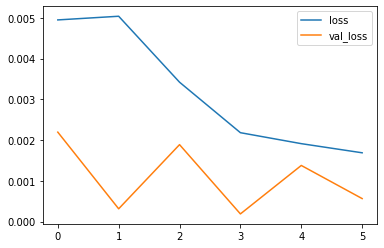

In [450]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [451]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)
for i in range(len(test)):
    #get prediction 1 time stamp ahead [0] is for grabbing just the number instrad of array
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

C:\Users\HP\AppData\Local\Temp/ipykernel_11356/4091339538.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

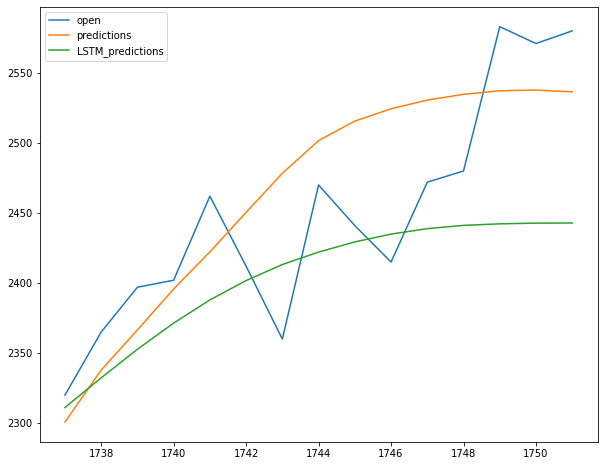

In [452]:
true_predictions=scalar.inverse_transform(test_predictions)
test['LSTM_predictions']=true_predictions
test.plot(figsize=(10,8))

In [453]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(15):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [454]:
forecast=scalar.inverse_transform(forecast)

In [455]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))


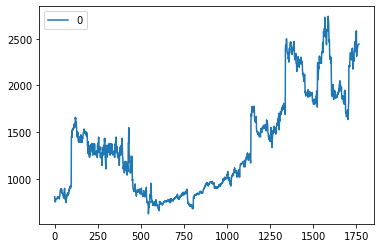

In [456]:
full_data.plot();

In [457]:
forecast

array([[2311.15254259],
       [2332.34398341],
       [2352.7130059 ],
       [2371.40243101],
       [2387.93669188],
       [2401.75986898],
       [2413.20722687],
       [2422.08581841],
       [2429.36919546],
       [2434.92788696],
       [2438.82410955],
       [2441.16693127],
       [2442.2606343 ],
       [2442.75987875],
       [2442.86743546]])

In [459]:
full_data.tail(15)

,0
1752,2311.152543
1753,2332.343983
1754,2352.713006
1755,2371.402431
1756,2387.936692
1757,2401.759869
1758,2413.207227
1759,2422.085818
1760,2429.369195
1761,2434.927887
